In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets, linear_model
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import ipywidgets as widgets
from ast import literal_eval
import numpy as np


pd.options.mode.chained_assignment = None  #default='warn'




In [55]:
#load the data
movie_data = pd.read_csv('movie_metadata2.csv', low_memory=False)

df = pd.DataFrame(movie_data)
#df.head(5)


In [56]:


movie_data = pd.read_csv('movie_metadata2.csv', low_memory=False)
indices = pd.Series(movie_data.index, 
                    index=movie_data['genres']).drop_duplicates()

#indices[:10]


In [57]:

# tfidf_vector = TfidfVectorizer(stop_words='english')

movie_data['genres'] = movie_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])

#tfidf_matrix = tfidf_vector.fit_transform(movie_data['genres'])


In [58]:
# movie_data['vote_count']

In [59]:
vote_count= movie_data[movie_data['vote_count'].notnull()]['vote_count'].astype('int')

vote_averages = movie_data[movie_data['vote_average'].notnull()]['vote_average'].astype('int')

C = vote_averages.mean()

#C

In [60]:
m = vote_count.quantile(0.95)
#m

In [61]:
#movie_data['release_date']

In [62]:
#pd.to_datetime(movie_data['release_date'], errors='coerce')

In [63]:
movie_data['year'] = pd.to_datetime(movie_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [64]:
qualified = movie_data[(movie_data['vote_count'] >= m) & (movie_data['vote_count'].notnull()) & (movie_data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]

qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
#qualified.shape

In [65]:
def weight_rate(x):
    v = x['vote_count']
    R = x['vote_average']
    
    return (v/(v+m)*R) + (m/(m+v)*C)

In [66]:
qualified['wr'] = qualified.apply(weight_rate, axis = 1)

In [67]:
#qualified.head()
#qualified.sort_values('wr', ascending=False).head(250)

In [68]:
#qualified.head(15)

In [69]:
def update_df_length(limit):
    
    df = pd.read_csv('movie_metadata2.csv', low_memory=False)

    df = df.iloc[0:limit, :]
    
    print("Number of rows in file.")
    widgets.interactive(update_df_length, limit=limit)

In [70]:
s = movie_data.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)

In [71]:
s.name = 'genre'
gen_md = movie_data.drop('genres', axis=1).join(s)




# Type desired genre into top_movie

### The recommended movie will be displayed below



#### Instructions

##### 1. Scroll to bottom of cell
##### 2. Locate top_movie call (It is write underneath the "Type Desired Genre Here" comment
##### 3. Type desired genre in single quotes
##### 4. Press the play button located under the tabs
##### 5. View recommended movie below the cell

In [72]:
def top_movie(genre, n_percentile = .85):
    df = gen_md[gen_md['genre'] == genre]
    vote_count = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    
    vote_avg = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_avg.mean()
    m = vote_count.quantile(n_percentile)
    
    qualified = df[(df['vote_count']>= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][
        ['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['weighted_average'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m)*x['vote_average'])+(m/(m+x['vote_count'])*C), axis =1)
                                                                                                         
                                                                                                         
                                                                    
    qualified = qualified.sort_values('weighted_average',ascending = False).head(29)
                                                                
    return qualified





# Type Desired Genre Here
top_movie('Comedy')

,title,year,vote_count,vote_average,popularity,weighted_average
0,Toy Story,1995,5415,7,22,7
18,Ace Ventura: When Nature Calls,1995,1128,6,8,6




# Histogram Displaying Ratings Average


Text(0, 0.5, 'Ratings Average')

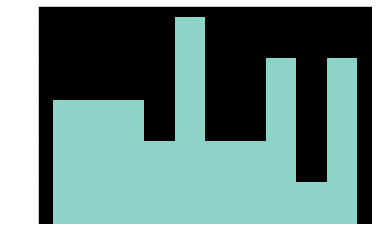

In [73]:
plt.figure(figsize = (12,4))
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline
#lt.hist(vote_average['vote_count'], bins= 28, color='tab: purple')
#plt.ylabel('Ratings Count (Scaled)', fontsize=16)
df['vote_average'].plot(kind = "hist")
plt.ylabel('Ratings Average', fontsize=12)




In [74]:
df = pd.read_csv('movie_metadata2.csv')
data = pd.DataFrame(df, columns=['revenue', 'title'])

data_sorted = data.sort_values(by='revenue', ascending=False)

data_sorted['revenue'] = data_sorted['revenue']/1000000
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('title', inplace=True)
ranking = data_sorted.head(10)


        


In [75]:
index = ranking.index
values = ranking['revenue']
plot_title = 'Top 10 movies by Revenue, USD million'
title_size = 18
x_label = 'Revenue, USD millions'
filename = 'barh-plot'

In [76]:
ranking.sort_values(by='revenue', inplace=True, ascending=True)

# Bar Graph Displaying Top 10 Movies By Revenue (USD Millions)

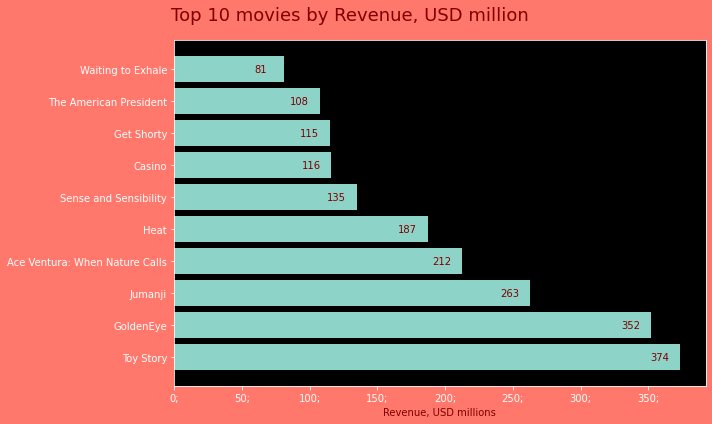

In [77]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=(1.0, 0.47, 0.42))
mpl.pyplot.viridis()

bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f};'))

title = plt.title(plot_title, pad=20, fontsize=title_size, color='maroon')

title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

rects = ax.patches 

for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height()/2
    
    space = -30
    
    ha = 'left'
    
    if x_value < 0:
        space*= -1
        ha = 'right'
        
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space,0),
        textcoords='offset points',
        va='center',
        ha=ha,
        color='maroon')
    
    tfrom = ax.get_xaxis_transform()

    ax.set_xlabel(x_label, color='maroon')                               

# Horizontal Bar Graph Displaying Counts for various Genre Collections

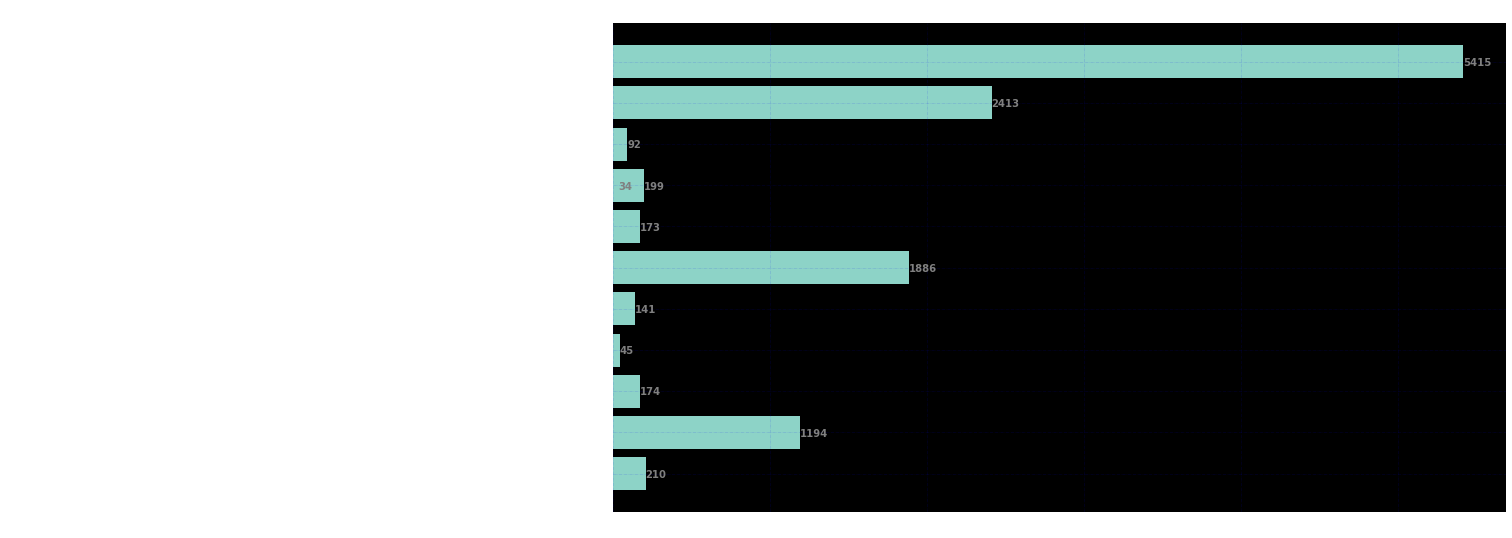

In [78]:
fig, ax = plt.subplots(figsize = (16, 9))


#movie_data['genres'] = movie_data[

genres = df['genres'].head(12)
vote_count = df['vote_count'].head(12)

ax.barh(genres, vote_count)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(visible = True, color = 'blue', linestyle = '-.', linewidth = 0.5, alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'grey')
    
ax.set_title('Genre Collections And Their Vote Counts', loc = 'left')
             
plt.show()